In [3]:
# Standard data science imports
import numpy as np
import pandas as pd
from pandas import DataFrame



# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Statistics packages
import pylab
import statsmodels.api as sm
import statistics as stat
from scipy import stats

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
#import given CSV 
df = pd.read_csv ("C:/Users/blien/Documents/WGU/D208/Task_2/3kfid8emf9rkc9ek30sf/medical_clean.csv",dtype={'locationid':np.int64}) 
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [5]:
# explore missing data
missing = df[df.columns[df.isna().any()]].columns
df_missing = df[missing]
print(df_missing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Empty DataFrameNone


In [6]:
# look for duplicate data - looking for zero rows
df[df.duplicated()]

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8


In [7]:
# check if any cols are duplicated - Looking for False
df.columns.duplicated().any()

False

In [8]:
#renaming columns to better describe them
df.rename(columns = {'Item1':'Timely admission',
'Item2':'Timely treatment',
'Item3':'Timely visits',
'Item4':'Reliability',
'Item5':'Options',
'Item6':'Hours of treatment',
'Item7':'Courteous staff',
'Item8':'Active listening from Doctor'},
inplace=True)

In [9]:
# drop unwanted data
df = df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction','UID', 'City','State', 'County', 'Zip', 'Lat', 'Lng','Population','Area', 'TimeZone', 'Job', 'Marital', 'Complication_risk'])

In [10]:
df.head()

,Children,Age,Income,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,...,TotalCharge,Additional_charges,Timely admission,Timely treatment,Timely visits,Reliability,Options,Hours of treatment,Courteous staff,Active listening from Doctor
0,1,53,86575.93,Male,No,19.141466,6,0,0,No,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,3,51,46805.99,Female,No,18.940352,4,2,1,No,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,53,14370.14,Female,No,18.057507,4,1,0,No,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,0,78,39741.49,Male,No,16.576858,4,1,0,No,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,1,22,1209.56,Female,No,17.439069,5,0,2,Yes,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [11]:
# variable for numeric data
num_cols = df.select_dtypes(include="number").columns
print(num_cols)

Index(['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge',
       'Additional_charges', 'Timely admission', 'Timely treatment',
       'Timely visits', 'Reliability', 'Options', 'Hours of treatment',
       'Courteous staff', 'Active listening from Doctor'],
      dtype='object')


In [12]:
# variable for categorical data
cat_cols = df.select_dtypes(include="object").columns
print(cat_cols)

Index(['Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin', 'HighBlood',
       'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia',
       'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis',
       'Asthma', 'Services'],
      dtype='object')


In [13]:
# convert categorical data into dummy variables 
for c in cat_cols:
    if c in df.columns:
        df = pd.get_dummies(df, columns=[c], drop_first=True)
pred_vars = df.select_dtypes(include="uint8").columns.tolist()
print(pred_vars)

['Gender_Male', 'Gender_Nonbinary', 'ReAdmis_Yes', 'Soft_drink_Yes', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission', 'HighBlood_Yes', 'Stroke_Yes', 'Overweight_Yes', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes', 'Reflux_esophagitis_Yes', 'Asthma_Yes', 'Services_CT Scan', 'Services_Intravenous', 'Services_MRI']


In [14]:
# reset the global target variable using its dummy variable
target = df['ReAdmis_Yes']

In [15]:
# describe numeric data
df[num_cols].describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Children,10000.0,2.097,2.164,0.000,0.000,1.000,3.000,10.000
Age,10000.0,53.512,20.639,18.000,36.000,53.000,71.000,89.000
Income,10000.0,40490.495,28521.153,154.080,19598.775,33768.420,54296.402,207249.100
VitD_levels,10000.0,17.964,2.017,9.806,16.626,17.951,19.348,26.394
Doc_visits,10000.0,5.012,1.046,1.000,4.000,5.000,6.000,9.000
Full_meals_eaten,10000.0,1.001,1.008,0.000,0.000,1.000,2.000,7.000
vitD_supp,10000.0,0.399,0.629,0.000,0.000,0.000,1.000,5.000
Initial_days,10000.0,34.455,26.309,1.002,7.896,35.836,61.161,71.981
TotalCharge,10000.0,5312.173,2180.394,1938.312,3179.374,5213.952,7459.700,9180.728
Additional_charges,10000.0,12934.529,6542.602,3125.703,7986.488,11573.978,15626.490,30566.070


<Figure size 720x1440 with 0 Axes>

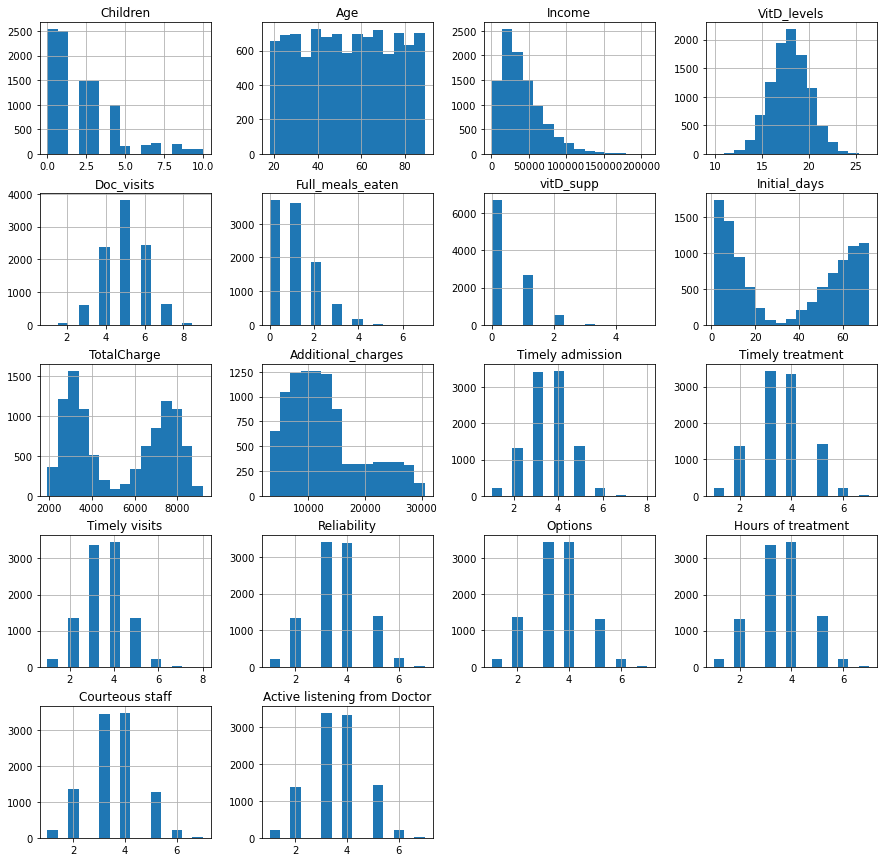

In [16]:
# histogram plot numeric data
fig = plt.figure(figsize=(10, 20))
ax = df[num_cols].hist(bins = 15, figsize=(15,15))
plt.title('Numeric Data')
fig.tight_layout(h_pad=5, w_pad=5)
plt.show()

In [17]:
df.dtypes

Children                                 int64
Age                                      int64
Income                                 float64
VitD_levels                            float64
Doc_visits                               int64
Full_meals_eaten                         int64
vitD_supp                                int64
Initial_days                           float64
TotalCharge                            float64
Additional_charges                     float64
Timely admission                         int64
Timely treatment                         int64
Timely visits                            int64
Reliability                              int64
Options                                  int64
Hours of treatment                       int64
Courteous staff                          int64
Active listening from Doctor             int64
Gender_Male                              uint8
Gender_Nonbinary                         uint8
ReAdmis_Yes                              uint8
Soft_drink_Ye

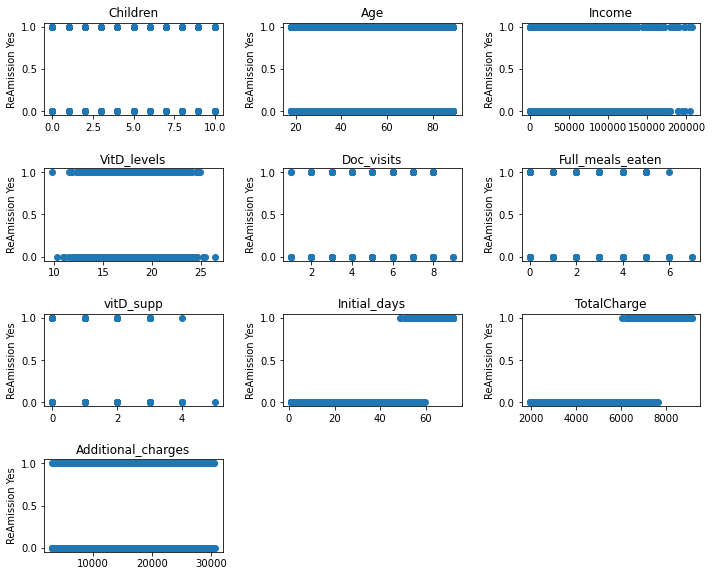

In [18]:
# scatter plot of selected features
fig = plt.figure(figsize=(10, 20))
features = df[['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge',
       'Additional_charges']]

for i, col in enumerate(features):
    plt.subplot(10, 3, i+1)
    x = df[col]
    y = df['ReAdmis_Yes']
    plt.scatter(x, y, marker='o')
    plt.title(col)
    #plt.xlabel(col)
    plt.ylabel('ReAmission Yes')
    fig.tight_layout(h_pad=2, w_pad=2)

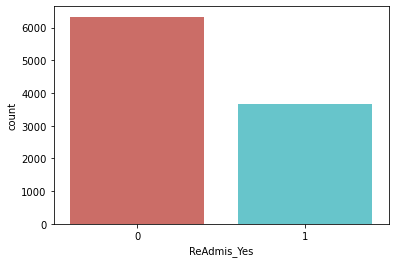

In [19]:
#show distribution on target variable
sns.countplot(x = df['ReAdmis_Yes'], data = df, palette = 'hls')
plt.show()

In [20]:
df['ReAdmis_Yes'].value_counts()

0    6331
1    3669
Name: ReAdmis_Yes, dtype: int64

In [21]:
#show percentage of target variables
count_no_sub = len(df[df['ReAdmis_Yes']==0])
count_sub = len(df[df['ReAdmis_Yes']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of patients without readmission", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of patients with readmission", pct_of_sub*100)

percentage of patients without readmission 63.31
percentage of patients with readmission 36.69


In [22]:
# Provide copy of the prepared data set.
final_data = 'd208_task2_final_data.csv'
df.to_csv(final_data, index=False, header=True)
print('File saved to: {}'.format(final_data))

File saved to: d208_task2_final_data.csv


In [23]:
df.columns

Index(['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge',
       'Additional_charges', 'Timely admission', 'Timely treatment',
       'Timely visits', 'Reliability', 'Options', 'Hours of treatment',
       'Courteous staff', 'Active listening from Doctor', 'Gender_Male',
       'Gender_Nonbinary', 'ReAdmis_Yes', 'Soft_drink_Yes',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission', 'HighBlood_Yes', 'Stroke_Yes',
       'Overweight_Yes', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes',
       'BackPain_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes',
       'Reflux_esophagitis_Yes', 'Asthma_Yes', 'Services_CT Scan',
       'Services_Intravenous', 'Services_MRI'],
      dtype='object')

In [24]:
#initial model
df = pd.read_csv('d208_task2_final_data.csv')
df['intercept'] = 1
med_logit_model = sm.Logit(df['ReAdmis_Yes'], df[['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge',
       'Additional_charges', 'Timely admission', 'Timely treatment',
       'Timely visits', 'Reliability', 'Options', 'Hours of treatment',
       'Courteous staff', 'Active listening from Doctor', 'Gender_Male',
       'Gender_Nonbinary', 'Soft_drink_Yes',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission', 'Stroke_Yes',
       'Overweight_Yes', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes',
       'BackPain_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes',
       'Reflux_esophagitis_Yes', 'Asthma_Yes', 'Services_CT Scan',
       'Services_Intravenous', 'Services_MRI', 'HighBlood_Yes', 'intercept']]).fit()

print(med_logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.033969
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:            ReAdmis_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9962
Method:                           MLE   Df Model:                           37
Date:                Tue, 20 Dec 2022   Pseudo R-squ.:                  0.9483
Time:                        11:07:11   Log-Likelihood:                -339.69
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Children                                0.0770      0.046

In [26]:
# equation of the regression line/plane
print('Logit: {:.2f}'.format(logit_roc_auc))
equation = med_logit_model.summary2().tables[1]
print('Estimate [{}] as L = '.format(med_logit_model.summary2().tables[0][1][1]))
for i in equation.itertuples():
    print('   {:+.3f} x ( {} ) '.format(i[1],i[0]))

NameError: name 'logit_roc_auc' is not defined

In [283]:
X = df[['Initial_days', 'TotalCharge',
       'Timely treatment',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission', 'Stroke_Yes',
        'Arthritis_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes',
       'Reflux_esophagitis_Yes', 'Asthma_Yes', 'Services_CT Scan',
        'Services_MRI',]]

In [284]:
# the independent variables set
B = df[['Initial_days', 'TotalCharge',
       'Timely treatment',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission', 'Stroke_Yes',
        'Arthritis_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes',
       'Reflux_esophagitis_Yes', 'Asthma_Yes', 'Services_CT Scan',
        'Services_MRI',]]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = B.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(B.values, i)
                          for i in range(len(B.columns))]
  
print(vif_data)

                                feature         VIF
0                          Initial_days   55.589038
1                           TotalCharge  122.661984
2                      Timely treatment   11.281452
3     Initial_admin_Emergency Admission    4.239495
4   Initial_admin_Observation Admission    1.930854
5                            Stroke_Yes    1.246819
6                         Arthritis_Yes    1.583389
7                           Anxiety_Yes    1.509682
8                 Allergic_rhinitis_Yes    1.681690
9                Reflux_esophagitis_Yes    1.736462
10                           Asthma_Yes    1.401865
11                     Services_CT Scan    1.147265
12                         Services_MRI    1.044912


In [285]:
#reduced model
df['intercept'] = 1
med_logit_model = sm.Logit(df['ReAdmis_Yes'], df[['Initial_days', 
       'Timely treatment',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission', 'Stroke_Yes',
        'Arthritis_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes',
       'Reflux_esophagitis_Yes', 'Asthma_Yes', 'Services_CT Scan',
        'Services_MRI',
        'intercept']]).fit()

print(med_logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.036944
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:            ReAdmis_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Tue, 31 May 2022   Pseudo R-squ.:                  0.9438
Time:                        12:30:49   Log-Likelihood:                -369.44
converged:                       True   LL-Null:                       -6572.9
                                        LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Initial_days                            1.3225      0.070

In [2]:
#reduced model
df['intercept'] = 1
med_logit_model = sm.Logit(df['ReAdmis_Yes'], df[['Initial_days', 
       'Initial_admin_Emergency Admission',
       'Stroke_Yes',
        'Arthritis_Yes', 'Anxiety_Yes',  'Asthma_Yes', 'Services_CT Scan',
        'Services_MRI',
        'intercept']]).fit()

print(med_logit_model.summary())

NameError: name 'df' is not defined

In [287]:
# the independent variables set
B = df[['Initial_days', 
       'Initial_admin_Emergency Admission',
        'Stroke_Yes',
        'Arthritis_Yes', 'Anxiety_Yes',  'Asthma_Yes', 'Services_CT Scan',
        'Services_MRI',]]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = B.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(B.values, i)
                          for i in range(len(B.columns))]
  
print(vif_data)

                             feature       VIF
0                       Initial_days  1.892056
1  Initial_admin_Emergency Admission  1.644938
2                         Stroke_Yes  1.187678
3                      Arthritis_Yes  1.410166
4                        Anxiety_Yes  1.360931
5                         Asthma_Yes  1.301000
6                   Services_CT Scan  1.120346
7                       Services_MRI  1.036849


In [288]:
X = df[['Initial_days', 
       'Timely treatment',
       'Initial_admin_Emergency Admission',
        'Stroke_Yes',
        'Arthritis_Yes', 'Anxiety_Yes',  'Asthma_Yes', 'Services_CT Scan',
        'Services_MRI',]]
y = df['ReAdmis_Yes']

In [289]:
#Split dataset into training and test dataset
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
logreg = LogisticRegression(random_state = 1)
logreg.fit(X_train, y_train)

C:\Users\blien\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=1)

In [290]:
#predict the Test set results
y_pred = logreg.predict(X_test)

In [291]:
#Make Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1245   16]
 [  13  726]]


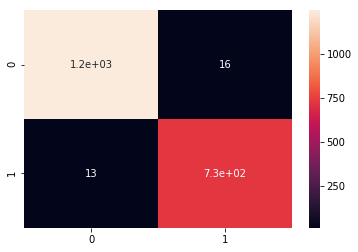

In [292]:
y_predict_test = logreg.predict(X_test)
cm2 = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm2, annot = True)

In [293]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1261
           1       0.98      0.98      0.98       739

    accuracy                           0.99      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



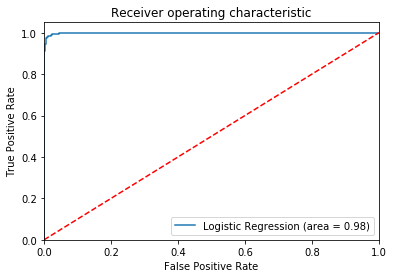

In [294]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [295]:
# equation of the regression line/plane
print('Logit: {:.2f}'.format(logit_roc_auc))
equation = med_logit_model.summary2().tables[1]
print('Estimate [{}] as L = '.format(med_logit_model.summary2().tables[0][1][1]))
for i in equation.itertuples():
    print('   {:+.3f} x ( {} ) '.format(i[1],i[0]))

Logit: 0.98
Estimate [ReAdmis_Yes] as L = 
   +1.287 x ( Initial_days ) 
   +1.850 x ( Initial_admin_Emergency Admission ) 
   +1.439 x ( Stroke_Yes ) 
   -1.050 x ( Arthritis_Yes ) 
   -0.842 x ( Anxiety_Yes ) 
   -1.101 x ( Asthma_Yes ) 
   +1.390 x ( Services_CT Scan ) 
   +2.318 x ( Services_MRI ) 
   -70.411 x ( intercept ) 
